In [1]:
from zlib import crc32
import numpy as np

mail = 'vasyukova.mn@phystech.edu'
to_hash =  mail.strip().split('@')[0]    
h = crc32(to_hash.encode('utf-8')) + 127
seed = h%(2**32-1)
rs = np.random.RandomState(seed)
task1 = rs.randint(low=1, high=5)
task2 = rs.randint(low=1, high=5)
print ('Your tasks are 1.{}, 2.{}'.format(task1, task2))

Your tasks are 1.1, 2.3


In [0]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from statsmodels.regression.linear_model import OLS

In [0]:
X_train = np.load('regression_x_train.npy')
Y_train = np.load('regression_y_train.npy')
X_test = np.load('regression_x_test.npy')

In [5]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (286, 604, 35)
Y_train: (286, 604)
X_test: (420, 620, 35)


In [0]:
xa, xb, xc = X_train.shape
X_train = X_train.reshape((xa * xb, xc))
ya, yb = Y_train.shape
Y_train = Y_train.reshape((ya*yb))
ta, tb, tc = X_test.shape
X_test = X_test.reshape((ta * tb, tc))

Построим модель на всех признаках

In [7]:
simple_model = OLS(Y_train, X_train).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        17:18:46   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.722e-07   4.71e-10   -365.889      0.000   -1.73e-07   -1.71e-07
x2          1.823e-06   5.36e-09    340.455      0.000    1.81e-06    1.83e-06
x3          2.797e-06   4.39e-09    636.411      0.000    2.79e-06    2.81e-06
x4             0.0160      0.000     42.012      0.000       0.015       0.017
x5             0.0133      0.000     35.243      0.000       0.013       0.014
x6         -1.429e-06   2.68e-09   -533.444      0.000   -1.43e-06   -1.42e-06
x7           3.18e-06   7.59e-09    419.136      0.000    3.17e-06     3.2e-06
x8          1.871e-06   3.18e-09    589.149      0.000    1.87e-06    1.88e-06
x9             0.0160      0.000     42.002      0.000       0.015       0.017
x10            0.0133      0.000     35.245      0.000       0.013       0.014
x11         1.581e-07   2.02e-09     78.293      0.000    1.54e-07    1.62e-07
x12         4.313e-07   5.51e-09     78.293      0.000    4.21e-07    4.42e-07
x13         8.381e-07   1.07e-08     78.293      0.000    8.17e-07    8.59e-07
x14         2.795e-05   3.57e-07     78.293      0.000    2.72e-05    2.86e-05
x15            0.0002   4.96e-07    427.850      0.000       0.000       0.000
x16            0.0001   2.36e-07    427.850      0.000       0.000       0.000
x17            0.0005   1.26e-06    427.850      0.000       0.001       0.001
x18            0.0005    1.2e-06    427.850      0.000       0.001       0.001
x19         4.835e-05   7.63e-08    633.760      0.000    4.82e-05    4.85e-05
x20            0.0003   4.42e-07    633.760      0.000       0.000       0.000
x21            0.0008    1.3e-06    633.760      0.000       0.001       0.001
x22            0.0003   5.51e-07    633.760      0.000       0.000       0.000
x23        -1.426e-06   5.32e-08    -26.782      0.000   -1.53e-06   -1.32e-06
x24        -2.968e-05   1.11e-06    -26.782      0.000   -3.19e-05   -2.75e-05
x25        -2.154e-05   8.04e-07    -26.782      0.000   -2.31e-05      -2e-05
x26        -3.056e-05   1.14e-06    -26.782      0.000   -3.28e-05   -2.83e-05
x27        -7.392e-06   2.69e-07    -27.459      0.000   -7.92e-06   -6.86e-06
x28        -6.281e-06   2.29e-07    -27.459      0.000   -6.73e-06   -5.83e-06
x29        -2.392e-05   8.71e-07    -27.459      0.000   -2.56e-05   -2.22e-05
x30        -4.091e-05   1.49e-06    -27.459      0.000   -4.38e-05    -3.8e-05
x31        -1.334e-06   2.38e-09   -560.112      0.000   -1.34e-06   -1.33e-06
x32         4.107e-06   7.33e-09    560.112      0.000    4.09e-06    4.12e-06
x33        -2.993e-08   5.34e-11   -560.112      0.000      -3e-08   -2.98e-08
x34        -2.345e-06   4.19e-09   -560.112      0.000   -2.35e-06   -2.34e-06
x35         1.824e-06   3.26e-09    560.112      0.000    1.82e-06    1.83e-06
==============================================================================
Om

Судя по последнему сообщению, матрица мультиколлинеарна. Попробуем найти линейную зависимость между признаками. Но перед этим посмотрим, распределение количества уникальных значений по признакам.

In [0]:
from itertools import combinations
from collections import Counter

In [0]:
const, binary = set(), set()
for i in range(35):
  n = len(Counter(X_train[:, i]))
  if n == 1:
    const.add(i)
  elif n == 2:
    binary.add(i)

In [10]:
const

{30, 31, 32, 33, 34}

In [11]:
binary

{0, 1, 2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

Уберем константные признаки и посчитаем корреляцию Пирсона на оставшихся признаках.

In [0]:
features = set(range(xc)) - const
pear1 = set()
for i, j in combinations(features, 2):
  r, pval = st.pearsonr(X_train[:, i], X_train[:, j])
  if abs(r) == 1:
    pear1.add(j)

In [13]:
pear1

{6, 14, 15, 16, 17, 23, 24, 25, 27, 28, 29}

Видим, что у нас присутствовало много дублирующих друг друга признаков. Удалим их.

In [0]:
features -= pear1
pear2 = set()
for i, j in combinations(features, 2):
  r, pval = st.pearsonr(X_train[:, i], X_train[:, j])
  if abs(r) > 0.9:
    pear2.add(j)
    # print(f'Index: {i, j}, correlation={r}')

In [15]:
pear2

{2, 5, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21}

Удалим также те признаки, которые сильно скореллированы. Посчитаем корреляцию Спирмена, чтобы проверить, нет ли какой-то еще монотонной зависимости.

In [16]:
features -= pear2
for i, j in combinations(features, 2):
  rho, pval = st.spearmanr(X_train[:, i], X_train[:, j])
  if abs(rho) > 0.9: 
    print(f'Index: {i, j}, correlation={rho}')

Index: (3, 22), correlation=0.9999999999999999
Index: (4, 26), correlation=1.0


Визуализируем зависимость между этими признаками.

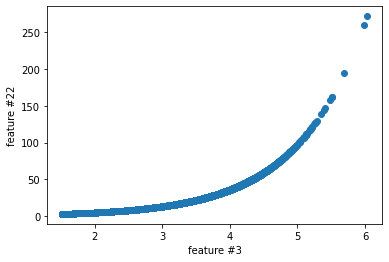

In [17]:
plt.plot(X_train[:, 3], X_train[:, 22], 'o')
plt.xlabel('feature #3')
plt.ylabel('feature #22')
plt.show()

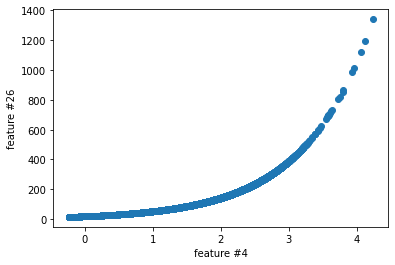

In [18]:
plt.plot(X_train[:, 4], X_train[:, 26], 'o')
plt.xlabel('feature #4')
plt.ylabel('feature #26')
plt.show()

Видим, что у признаков степенная зависимость. Найдем степени эти:

In [0]:
def get_degree(x, y):
  deg = 0
  best_r = 0
  for i in range(2, 10):
    r, p = st.pearsonr(x**i, y)
    if r > best_r:
      deg = i
      best_r = r
  for i in range(2, 10):
    r, p = st.pearsonr(x, y**i)
    if r > best_r:
      deg = -i
      best_r = r
  return deg

In [20]:
print(get_degree(X_train[:, 4], X_train[:, 26]))
print(get_degree(X_train[:, 3], X_train[:, 22]))

2
4


То есть $$x_{26} = c_1\cdot x_4^2 \\ 
x_{22} = c_1\cdot x_3^4$$

Не будем убирать эти признаки, обучим модель на оставшихся признаках.

In [21]:
X_train1 = np.array([X_train[:, x] for x in features]).T
model1 = OLS(Y_train, X_train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.182e+06
Date:                Sat, 16 May 2020   Prob (F-statistic):                        0.00
Time:                        17:20:01   Log-Likelihood:                      1.6147e+05
No. Observations:              172744   AIC:                                 -3.229e+05
Df Residuals:                  172738   BIC:                                 -3.229e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0052      0.001     -5.237      0.000      -0.007      -0.003
x2            -0.0869      0.001   -144.661      0.000      -0.088      -0.086
x3             0.3416      0.000    845.641      0.000       0.341       0.342
x4             0.0520      0.001     47.672      0.000       0.050       0.054
x5            -0.0208   5.83e-05   -357.497      0.000      -0.021      -0.021
x6            -0.0002   1.67e-05    -12.361      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   117588.117   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23658822.710
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      60.153   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что качество значительно улучшилось, если судить по коэффициенту детерминации.

In [22]:
features

{0, 1, 3, 4, 22, 26}

Попробуем добавлять по одной попарной зависимости

In [23]:
for i, j in combinations(features, 2):
  train = np.array([X_train[:, x] for x in features]).T
  col = X_train[:, i] * X_train[:, j]
  d = col.shape[0]
  train = np.hstack((train, col.reshape((d, 1))))
  m = OLS(Y_train, train).fit()
  print('Indexes:', i, j)
  print(m.summary())

Indexes: 0 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        17:20:12   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2373      0.003    421

Видим, что лучшее качество дает модель с признаком $x_1\cdot x_{22}$. Она доставляет качество $R^2 = 0.996$. Добавим этот признак и обучим финальную модель.

In [24]:
train = np.array([X_train[:, x] for x in features]).T
col = X_train[:, 1] * X_train[:, 22]
d = col.shape[0]
train = np.hstack((train, col.reshape((d, 1))))
best_model = OLS(Y_train, train).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.825e+06
Date:                Sat, 16 May 2020   Prob (F-statistic):                        0.00
Time:                        17:20:20   Log-Likelihood:                      3.1083e+05
No. Observations:              172744   AIC:                                 -6.217e+05
Df Residuals:                  172737   BIC:                                 -6.216e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1019      0.000    233.712      0.000       0.101       0.103
x2             0.6318      0.001    750.380      0.000       0.630       0.633
x3            -0.0295      0.000    -65.862      0.000      -0.030      -0.029
x4             0.0232      0.000     50.385      0.000       0.022       0.024
x5             0.1046      0.000    735.144      0.000       0.104       0.105
x6            -0.0003   7.03e-06    -46.654      0.000      -0.000      -0.000
x7            -0.1192      0.000   -894.936      0.000      -0.119      -0.119
==============================================================================
Omnibus:                     2921.420   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5946.845
Skew:                           0.016   Prob(JB):                         0.00
Kurtosis:                       3.908   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Посмотрим, как $y$ зависит от каждого признака в отдельности.

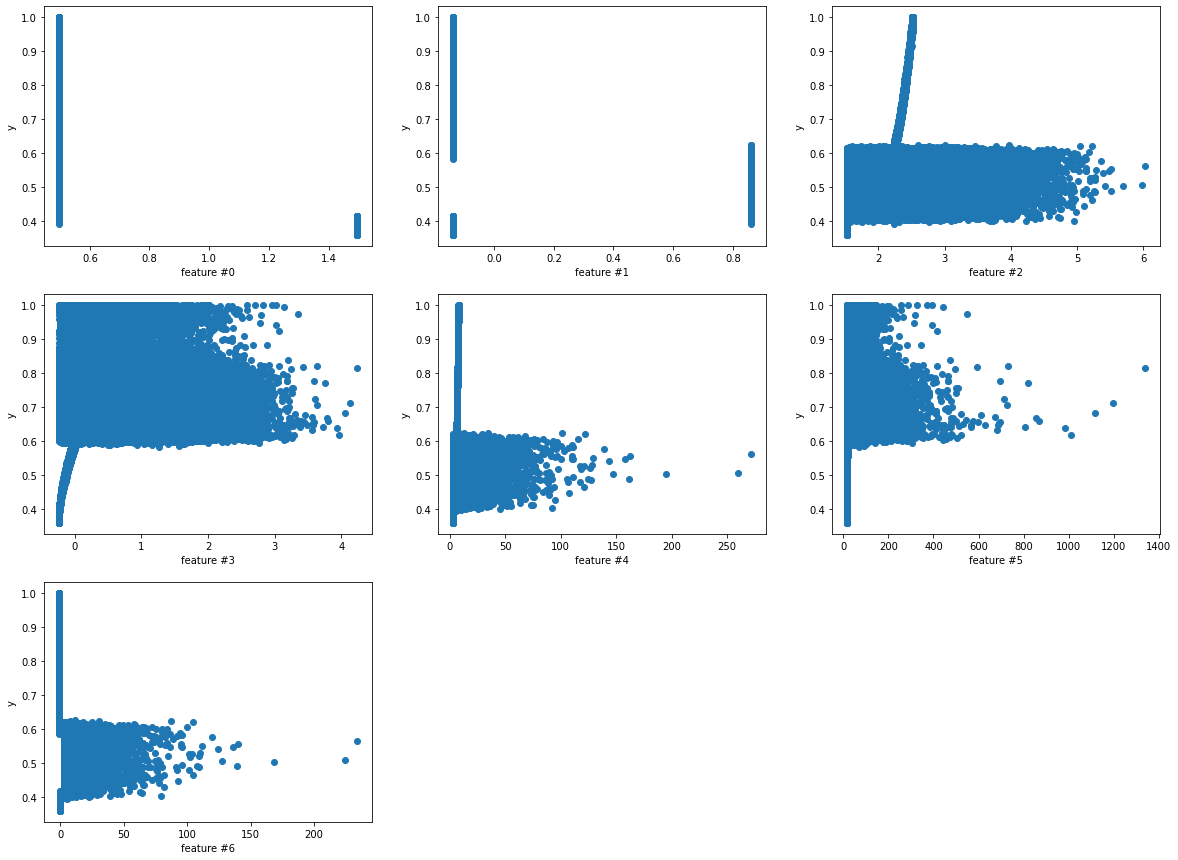

In [25]:
plt.figure(figsize=(20, 15))
for i in range(len(features)+1):
  plt.subplot(3, 3, i+1)
  plt.plot(train[:, i], Y_train, 'o')
  plt.xlabel(f'feature #{i}')
  plt.ylabel('y')

Из графиков видно, что есть пара бинарных признаков, для которых существует интервал, при попадании в который y, признок меняет значение (feature #0, #1). На остальных графиках видно, что есть интервал, в котором признак хорошо описывает y, а в остальной области - шум. Но в объединении хороших интервалов покрывается все множество значений y, поэтому модель дает достаточно хорошее качество.

Теперь посмотрим на картинки

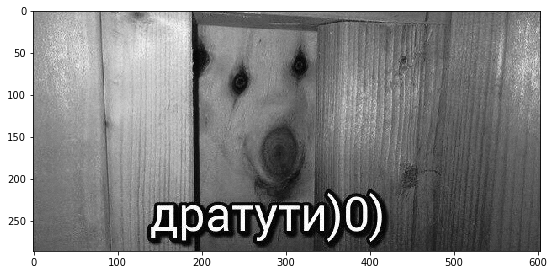

In [26]:
import matplotlib.cm as cm
Y_train = Y_train.reshape((ya, yb))
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(Y_train, interpolation='nearest', cmap=cm.Greys_r)
plt.show()

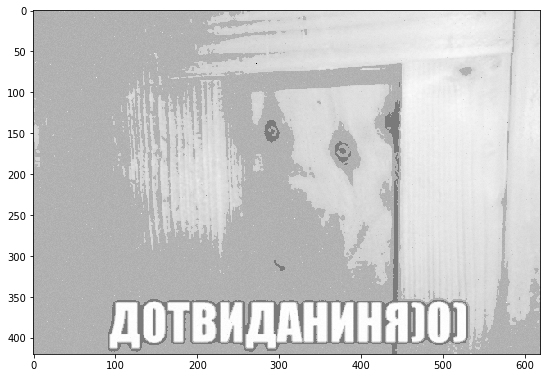

In [28]:
test = np.array([X_test[:, x] for x in features]).T
col = X_test[:, 1] * X_test[:, 22]
d = col.shape[0]
test = np.hstack((test, col.reshape((d, 1))))

y_test = best_model.predict(test)
y_test = y_test.reshape((ta, tb))
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(y_test, interpolation='nearest', cmap=cm.Greys_r)
plt.show()